<a href="https://colab.research.google.com/github/SaurabhChakravorty/SHALA2020/blob/master/Saurabh_ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)
df = attrition_data
df = df.drop('ID',axis=1)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [3]:
# Let's do some preprocessing in data
print("The description of data is :")
print(df.isna().sum())
print(df.describe())

The description of data is :
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCu

In [0]:
# Employee count is a rdundant column let's drop it as it just has a value 1
df.EmployeeCount.unique()
df = df.drop('EmployeeCount',axis=1)

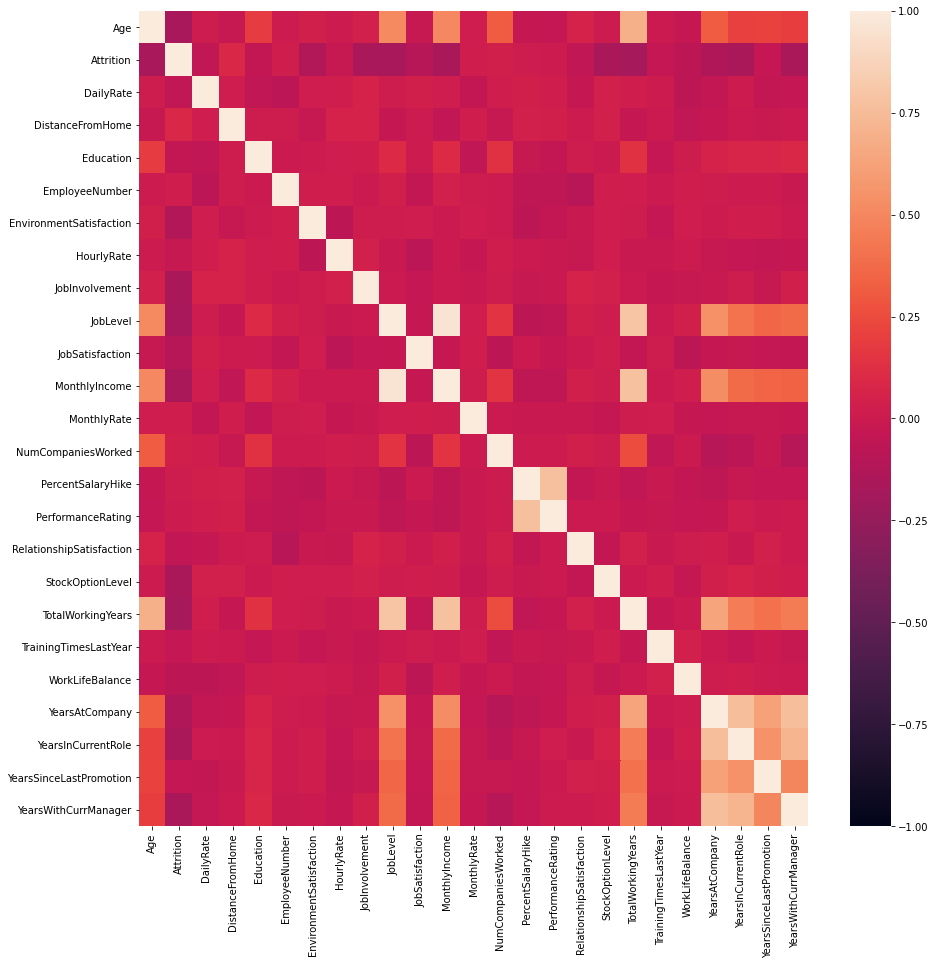

In [5]:
# Find out the correlation matrix
corr_df = df.corr()
plt.figure(figsize=(15,15))
# Creating mask
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap 
sns.heatmap(corr_df,vmin = -1, annot=False)

There exist a strong and very strong linear relationship between monthly income and job level which could lead to multicollinearity

In [0]:
# Let's drop job level for that purpose
df = df.drop('JobLevel',axis=1)

In [0]:
# For one hot encoding the categorical variables
def create_one_hot(df, column_name):
    """One-hot encode column values. Takes the df and column name as
    input and return the df with one-hot encoded columns as output.
    """
    df[column_name] = pd.Categorical(df[column_name])
    one_hot = pd.get_dummies(df[column_name], prefix = column_name)
    # add dummies to original df:
    df = pd.concat([one_hot, df], axis = 1)
    return df

In [0]:
# Getting the dummy vars to categorical data
col = df.select_dtypes(['object']).columns
for c in col:
  df = create_one_hot(df,c)
  df = df.drop(c,axis=1)

Since the dataset is highly imbalanced we need to balance the dataset with estimator variables

In [9]:

# Separate majority and minority classes
data_ori_majority = df[df.Attrition==0]
data_ori_minority = df[df.Attrition==1]
 
# Downsample majority class
from sklearn.utils import resample
data_ori_majority_downsampled = resample(data_ori_majority, 
                                         replace=False,    # sample without replacement
                                         n_samples=len(data_ori_minority),     # to match minority class
                                         random_state=0) # reproducible results
 # Combine minority class with downsampled majority class
data_ori_downsampled = pd.concat([data_ori_majority_downsampled, data_ori_minority])
print(data_ori_downsampled['Attrition'].value_counts())

1    172
0    172
Name: Attrition, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score

class classification:
  
  def __init__(self, X, y):
    
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  def calc_metrics_class(self):

    precision = precision_score(self.pred, self.y_test)
    recall = recall_score(self.pred,self.y_test)
    f1 = f1_score(self.pred,self.y_test)
    accuracy = accuracy_score(self.pred,self.y_test)
    print("precision", precision, '\n', "recall", recall, '\n', "f1", f1, '\n', "accuracy", accuracy)

  def gradient_boost(self):

      GradBoostClasCV = GradientBoostingClassifier(random_state=42)
      model_params = {
                        "max_depth": [30],
                        "subsample": [ 0.9],
                        "n_estimators":[300],
                        "learning_rate": [0.03],
                        "criterion": ['mae']
                      }
      grid_model = GridSearchCV(estimator=GradBoostClasCV, param_grid=model_params, cv=5, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = GradBoostClasCV.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()

  def random_forest(self):

      rf_model = RandomForestClassifier(random_state=1)
      param_grid = {
                    'n_estimators': [350],
                    'max_features': [0.9],
                    'min_samples_split': [6]
                    }
      grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = rf_model.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()

  def decision_tree(self):

      #create a dictionary of all values we want to test
      param_grid = { 'criterion':['gini'],'max_depth': [20]}
      # decision tree model
      dtree_model=DecisionTreeClassifier()
      #use gridsearch to test all values
      grid_model = GridSearchCV(dtree_model, param_grid, cv=5, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = dtree_model.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()

Due to memory constraints using only one hyperparameter 

In [11]:
X = data_ori_downsampled.drop('Attrition',axis=1)
y = data_ori_downsampled['Attrition']
p1 = classification(X,y)
p1.random_forest()
p1.gradient_boost()
p1.decision_tree()

Best parameters = {'max_features': 0.9, 'min_samples_split': 6, 'n_estimators': 350}
precision 0.6666666666666666 
 recall 0.6470588235294118 
 f1 0.6567164179104478 
 accuracy 0.6666666666666666
Best parameters = {'criterion': 'mae', 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 300, 'subsample': 0.9}
precision 0.5757575757575758 
 recall 0.5757575757575758 
 f1 0.5757575757575758 
 accuracy 0.5942028985507246
Best parameters = {'criterion': 'gini', 'max_depth': 20}
precision 0.6060606060606061 
 recall 0.6451612903225806 
 f1 0.625 
 accuracy 0.6521739130434783


## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  